In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [204]:
n = np.random.randint(15, size=[10, 10, 2])

In [575]:
def create_start_mask(img: np.ndarray):
    mask = np.zeros(img.shape, dtype=int)
    return mask


def rec(img: np.ndarray, mask: np.ndarray, delta_min: int, delta_max: int, pixel: list):
    """
    Заливка от начального пиксела впаво и влево.
    """
    queue = [pixel]
    while queue:
        pixel = queue.pop(0)
        if not check_in_mask(mask[pixel[0]][pixel[1]][pixel[2]], 255):
            forward(img, mask, delta_min, delta_max, pixel, queue)
            backward(img, mask, delta_min, delta_max, pixel, queue)
    return mask


def backward(img_arr: np.ndarray, mask: np.ndarray, delta_min: int, delta_max: int, pixel: list, queue: list):
    """
    Движение влево.
    """
    _pixel = deepcopy(pixel)
    while check_color(img_arr[_pixel[0]][_pixel[1]][_pixel[2]], delta_min, delta_max):
        mask[_pixel[0]][_pixel[1]][pixel[2]] = 255
        check_up_and_down_pixels(img_arr, mask, delta_min, delta_max, _pixel, queue)
        check_slice_pixels(img_arr, mask, delta_min, delta_max, _pixel, queue)
        if 0 <= _pixel[0] - 1:
            _pixel[0] -= 1
        else:
            break


def forward(img_arr: np.ndarray, mask: np.ndarray, delta_min: int, delta_max: int, pixel: list, queue: list):
    """
    Движение вправо.
    """
    _pixel = deepcopy(pixel)
    while check_color(img_arr[_pixel[0]][_pixel[1]][_pixel[2]], delta_min, delta_max):
        mask[_pixel[0]][_pixel[1]][_pixel[2]] = 255
        check_up_and_down_pixels(img_arr, mask, delta_min, delta_max, _pixel, queue)
        check_slice_pixels(img_arr, mask, delta_min, delta_max, _pixel, queue)
        if _pixel[0] + 1 < img_arr.shape[0]:
            _pixel[0] += 1
        else:
            break


def check_up_and_down_pixels(img_arr: np.ndarray, mask: np.ndarray,
                             delta_min: int, delta_max: int, pixel: list, queue: list):
    """
    Проверка пикселей и создание "опорных" точек.
    """
    if pixel[1] + 1 < img_arr.shape[1]:
        if not check_in_mask(mask[pixel[0]][pixel[1] + 1][pixel[2]], 255):
            if check_color(img_arr[pixel[0]][pixel[1] + 1][pixel[2]], delta_min, delta_max):
                queue.append([pixel[0], pixel[1] + 1, pixel[2]])
    if 0 <= pixel[1] - 1:
        if not check_in_mask(mask[pixel[0]][pixel[1] - 1][pixel[2]], 255):
            if check_color(img_arr[pixel[0]][pixel[1] - 1][pixel[2]], delta_min, delta_max):
                queue.append([pixel[0], pixel[1] - 1, pixel[2]])


def check_slice_pixels(img_arr: np.ndarray, mask: np.ndarray, delta_min: int, delta_max: int, pixel: list, queue: list):
    if pixel[2] + 1 < img_arr.shape[2]:
        if not check_in_mask(mask[pixel[0]][pixel[1]][pixel[2] + 1], 255):
            if check_color(img_arr[pixel[0]][pixel[1]][pixel[2] + 1], delta_min, delta_max):
                queue.append([pixel[0], pixel[1], pixel[2] + 1])
    if 0 <= pixel[2] - 1:
        if not check_in_mask(mask[pixel[0]][pixel[1]][pixel[2] - 1], 255):
            if check_color(img_arr[pixel[0]][pixel[1]][pixel[2] - 1], delta_min, delta_max):
                queue.append([pixel[0], pixel[1], pixel[2] - 1])


def check_color(a: int, min_delta: int, max_delta: int):
    """
    Проверка цвета пикселя изображения.
    """
    if min_delta <= a <= max_delta:
        return True
    else:
        return False


def check_in_mask(a: int, b: int):
    """
    Проверка закрашен ли пиксель в маске.
    """
    if a == b:
        return True
    else:
        return False


def main():
    x = 1
    y = 1
    z = 1
    n = np.random.randint(256, size=[10, 20, 2]).astype(np.uint8)
    delta = 90
    min_color = n[x][y][z] - delta
    max_color = n[x][y][z] + delta
    new_img = rec(n, create_start_mask(n), min_color, max_color, [x, y, z]).astype(np.uint8)
    return n, new_img
    # file_path = 'image_data/test_photo.bmp'
    # out_path = 'outputs.bmp'
    # img = cv.imread(file_path, 0)
    # Image.fromarray(rec(img,
    #                     create_start_mask(img),
    #                     min_color,
    #                     max_color, [x, y, z]).astype(np.uint8)).save(out_path)
    

In [576]:
n, new = main()

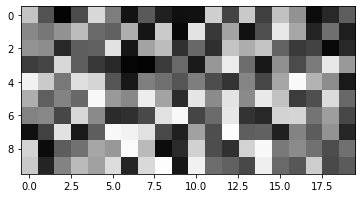

In [577]:
plt.imshow(n[:,:,0], cmap='gray', vmin=0, vmax=255)

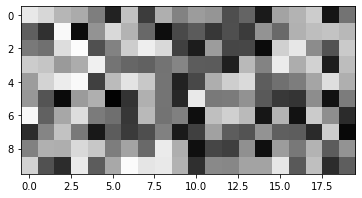

In [578]:
plt.imshow(n[:,:,1], cmap='gray', vmin=0, vmax=255)

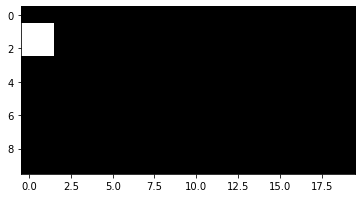

In [579]:
plt.imshow(new[:, :, 1], cmap='gray', vmin=0, vmax=255)

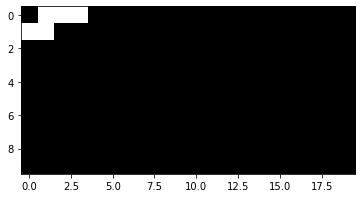

In [580]:
plt.imshow(new[:, :, 0], cmap='gray', vmin=0, vmax=255)